##### Uploading data from kaggle

In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/competitions/titanic/data?select=train.csv")

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


### Importing Libraries

In [2]:
#importing the liberaries that w'll use
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

### Reading data 

In [3]:
data = pd.read_csv('titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####  Splitting data into train and test 

In [5]:
X = data.drop('Survived',axis=1)
y = data['Survived']
X_train , X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2 )

####  Exploring and transforming the data

In [6]:
df_train = X_train
df_test = X_test
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
44,45,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
198,199,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
108,109,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
388,389,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
761,762,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 44 to 4
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          583 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [8]:
df_train.shape

(712, 11)

In [9]:
def drop_col(data):
    data = data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
    return data 

In [10]:
df_train = drop_col(df_train)

In [11]:
df_test = drop_col(df_test)

In [12]:
df_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,583.000000,712.000000,712.000000,712.000000
mean,2.294944,29.538885,0.525281,0.383427,32.373718
std,0.835282,14.889358,1.094382,0.799371,50.620826
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,8.044800
50%,3.000000,28.000000,0.000000,0.000000,15.072900
75%,3.000000,38.000000,1.000000,0.000000,31.068750
max,3.000000,74.000000,8.000000,6.000000,512.329200


In [13]:
medfair = df_train.describe()['Fare']['50%']

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


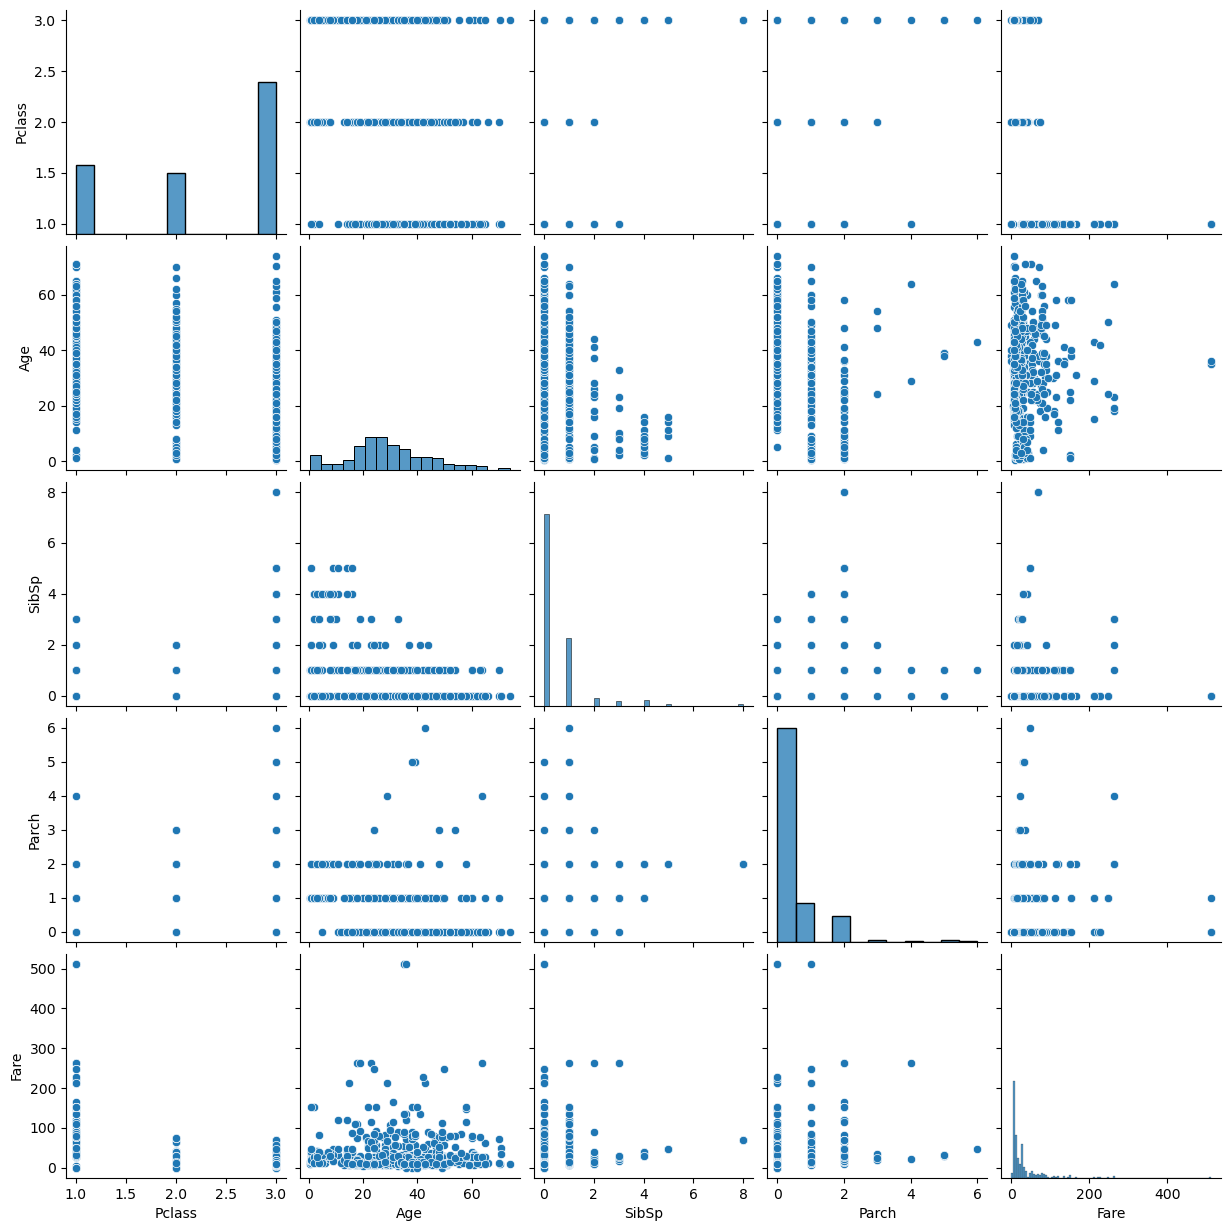

In [14]:
sns.pairplot(df_train);

<Axes: xlabel='Age', ylabel='Count'>

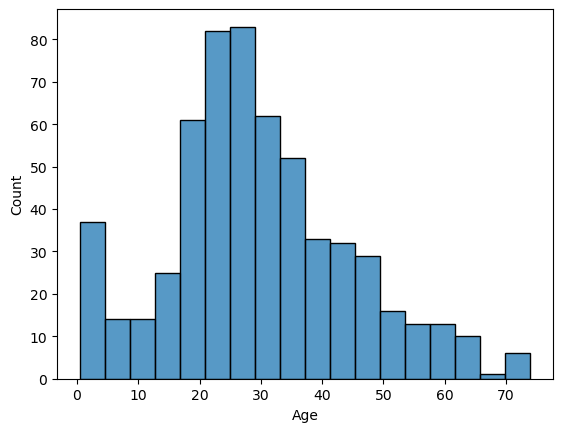

In [15]:
sns.histplot(df_train['Age'])

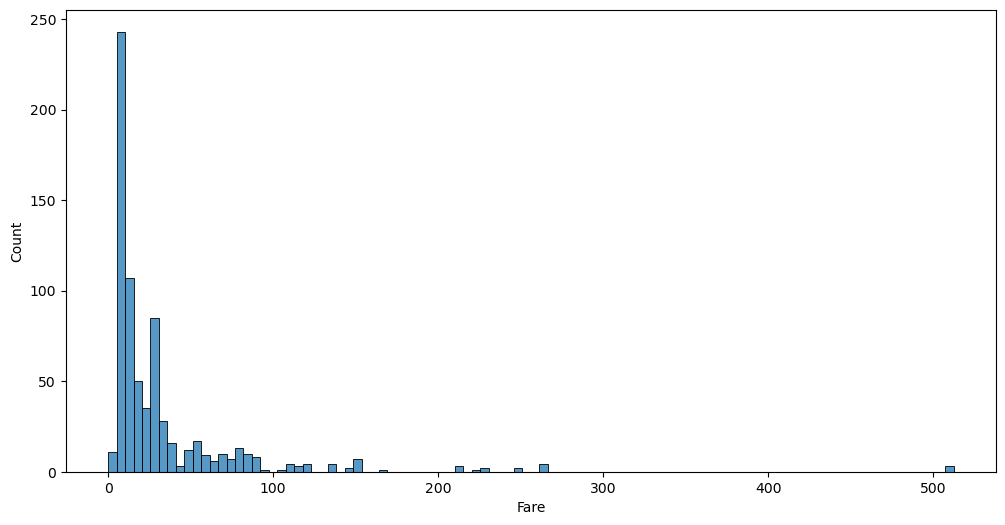

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(df_train['Fare']);

In [17]:
df_train.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [18]:
f_mean = df_train.groupby('Sex')['Age'].mean()[0]
m_mean = df_train.groupby('Sex')['Age'].mean()[1]

In [19]:
def fillnull(data):
    
    data.loc[data[data['Sex'] == 'female'].index,'Age'] = data.loc[data[data['Sex'] == 'female'].index,'Age'].fillna(f_mean)
    data.loc[data[data['Sex'] == 'male'].index,'Age'] = data.loc[data[data['Sex'] == 'male'].index,'Age'].fillna(m_mean)
    data['Fare'] = data['Fare'].fillna(medfair)
    return data

In [20]:
df_train = fillnull(df_train)

In [21]:
df_test = fillnull(df_test)

In [22]:
def clp_fare(data):
    data['Fare'] = data['Fare'].apply(lambda x: 200 if x>200 else x)
    return data

In [23]:
df_train  = clp_fare(df_train)

In [24]:
df_test = clp_fare(df_test)

### Preprocessing 

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
def encoding_categorical(data):
    le = LabelEncoder()
    cols = ['Sex','Embarked']
    for i in cols:
        data[i] = le.fit_transform(data[i])
    return data 

In [27]:
df_train = encoding_categorical(df_train)

In [28]:
df_test = encoding_categorical(df_test)

In [29]:
from sklearn.preprocessing import StandardScaler 

In [30]:
scaler = StandardScaler()

In [31]:
df_train = scaler.fit_transform(df_train)
df_test = scaler.fit_transform(df_test)

#### Modeling

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [33]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = AdaBoostClassifier()

In [34]:
clf1.fit(df_train,y_train)
clf2.fit(df_train,y_train)
clf3.fit(df_train,y_train)

AdaBoostClassifier()

##### DecisionTree

In [35]:
clf1.score(df_train,y_train)

0.9845505617977528

#### RandomForest

In [36]:
clf2.score(df_train,y_train)

0.9845505617977528

##### Adaboost

In [37]:
clf3.score(df_train,y_train)

0.8455056179775281

## Testing 

##### DecisionTree

In [38]:
clf1.score(df_test,y_test)

0.7206703910614525

#### RandomForest

In [39]:
clf2.score(df_test,y_test)

0.8100558659217877

##### Adaboost

In [40]:
clf3.score(df_test,y_test)

0.7541899441340782